<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg" />
</center> 
     
## <center>  [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

#### <center> Author: [Yury Kashnitsky](https://yorko.github.io) (@yorko) 

# <center>Assignment #2. Fall 2019
## <center> Part 2. Gradient boosting

**In this assignment, you're asked to beat a baseline in the ["Flight delays" competition](https://www.kaggle.com/c/flight-delays-fall-2018).**

This time we decided to share a pretty decent CatBoost baseline, you'll have to improve the provided solution.

Prior to working on the assignment, you'd better check out the corresponding course material:
 1. [Classification, Decision Trees and k Nearest Neighbors](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic03_decision_trees_kNN/topic3_decision_trees_kNN.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-3-decision-trees-and-knn) 
 2. Ensembles:
  - [Bagging](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part1_bagging.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-1-bagging)
  - [Random Forest](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part2_random_forest.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-2-random-forest)
  - [Feature Importance](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part3_feature_importance.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-5-ensembles-part-3-feature-importance)
 3. - [Gradient boosting](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic10_boosting/topic10_gradient_boosting.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-10-gradient-boosting) 
   - Logistic regression, Random Forest, and LightGBM in the "Kaggle Forest Cover Type Prediction" competition: [Kernel](https://www.kaggle.com/kashnitsky/topic-10-practice-with-logit-rf-and-lightgbm) 
 4. You can also practice with demo assignments, which are simpler and already shared with solutions:
  - "Decision trees with a toy task and the UCI Adult dataset": [assignment](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees) + [solution](https://www.kaggle.com/kashnitsky/a3-demo-decision-trees-solution)
  - "Logistic Regression and Random Forest in the credit scoring problem": [assignment](https://www.kaggle.com/kashnitsky/assignment-5-logit-and-rf-for-credit-scoring) + [solution](https://www.kaggle.com/kashnitsky/a5-demo-logit-and-rf-for-credit-scoring-sol)
 5. There are also 7 video lectures on trees, forests, boosting and their applications: [mlcourse.ai/video](https://mlcourse.ai/video) 
 6. mlcourse.ai tutorials on [categorical feature encoding](https://www.kaggle.com/waydeherman/tutorial-categorical-encoding) (by Wayde Herman) and [CatBoost](https://www.kaggle.com/mitribunskiy/tutorial-catboost-overview) (by Mikhail Tribunskiy)
 7. Last but not the least: [Public Kernels](https://www.kaggle.com/c/flight-delays-fall-2018/notebooks) in this competition

### Your task is to:
 1. beat **"A2 baseline (10 credits)"** on Public LB (**0.75914** LB score)
 2. rename your [team](https://www.kaggle.com/c/flight-delays-fall-2018/team) in full accordance with A1 and the [course rating](https://docs.google.com/spreadsheets/d/15e1K0tg5ponA5R6YQkZfihrShTDLAKf5qeKaoVCiuhQ/) (to appear on 16.09.2019)
 
This task is intended to be relatively easy. Here you are not required to upload your reproducible solution.
 
### <center> Deadline for A2: 2019 October 6, 20:59 CET (London time)

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from category_encoders.target_encoder import TargetEncoder
from xgboost import XGBRegressor

In [0]:
import matplotlib.pyplot as plt
from IPython.display import FileLink
import seaborn as sns
import pickle

In [4]:
!pwd
!ls -l
!ls -lR ../input/

/content/working
total 1752
-rw-r--r-- 1 root root   55207 Oct  4 18:47 grid.pkl
-rw-r--r-- 1 root root 1685492 Oct  4 18:59 submission.csv
-rw-r--r-- 1 root root   47528 Oct  4 18:55 xgb.pkl
../input/:
total 8
drwxr-xr-x 2 root root 4096 Oct  4 18:23 flight-delays-fall-2018
drwxr-xr-x 2 root root 4096 Oct  4 18:30 mlcourse-ai-fall-2019-xgboost

../input/flight-delays-fall-2018:
total 7772
---------- 1 root root 3287258 Dec  3  2018 flight_delays_test.csv
---------- 1 root root 3488296 Dec  3  2018 flight_delays_train.csv
---------- 1 root root 1178005 Dec  3  2018 sample_submission.csv

../input/mlcourse-ai-fall-2019-xgboost:
total 1311964
-rw------- 1 root root 245630891 Oct  4 18:23 test_enc.h5
-rw------- 1 root root 424926694 Oct  4 18:23 test.h5
-rw------- 1 root root 245630891 Oct  4 18:23 train_enc.h5
-rw------- 1 root root 425634293 Oct  4 18:23 train.h5
-rw-r--r-- 1 root root   1605136 Oct  4 18:28 y.h5


**Read the data**

In [0]:
train_df = pd.read_csv('../input/flight-delays-fall-2018/flight_delays_train.csv')
test_df = pd.read_csv('../input/flight-delays-fall-2018/flight_delays_test.csv')

In [0]:
train_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,DepMin,DepHours,DurationHours,ArrHours,DepHour,ArrHour,ArrMin,ArrTime,DepHourRange,DepMinRange,ArrHourRange,ArrMinRange,Month_DayofMonth_DayOfWeek,Month_DayofMonth_UniqueCarrier,Month_DayofMonth_Origin,Month_DayofMonth_Dest,Month_DayofMonth_DepHour,Month_DayofMonth_ArrHour,Month_DayofMonth_DepHourRange,Month_DayofMonth_DepMinRange,Month_DayofMonth_ArrHourRange,Month_DayofMonth_ArrMinRange,Month_DayOfWeek_UniqueCarrier,Month_DayOfWeek_Origin,Month_DayOfWeek_Dest,Month_DayOfWeek_DepHour,Month_DayOfWeek_ArrHour,Month_DayOfWeek_DepHourRange,Month_DayOfWeek_DepMinRange,Month_DayOfWeek_ArrHourRange,Month_DayOfWeek_ArrMinRange,...,Origin_DepHourRange_ArrHourRange,Origin_DepHourRange_ArrMinRange,Origin_DepMinRange_ArrHourRange,Origin_DepMinRange_ArrMinRange,Origin_ArrHourRange_ArrMinRange,Dest_DepHour_ArrHour,Dest_DepHour_DepHourRange,Dest_DepHour_DepMinRange,Dest_DepHour_ArrHourRange,Dest_DepHour_ArrMinRange,Dest_ArrHour_DepHourRange,Dest_ArrHour_DepMinRange,Dest_ArrHour_ArrHourRange,Dest_ArrHour_ArrMinRange,Dest_DepHourRange_DepMinRange,Dest_DepHourRange_ArrHourRange,Dest_DepHourRange_ArrMinRange,Dest_DepMinRange_ArrHourRange,Dest_DepMinRange_ArrMinRange,Dest_ArrHourRange_ArrMinRange,DepHour_ArrHour_DepHourRange,DepHour_ArrHour_DepMinRange,DepHour_ArrHour_ArrHourRange,DepHour_ArrHour_ArrMinRange,DepHour_DepHourRange_DepMinRange,DepHour_DepHourRange_ArrHourRange,DepHour_DepHourRange_ArrMinRange,DepHour_DepMinRange_ArrHourRange,DepHour_DepMinRange_ArrMinRange,DepHour_ArrHourRange_ArrMinRange,ArrHour_DepHourRange_DepMinRange,ArrHour_DepHourRange_ArrHourRange,ArrHour_DepHourRange_ArrMinRange,ArrHour_DepMinRange_ArrHourRange,ArrHour_DepMinRange_ArrMinRange,ArrHour_ArrHourRange_ArrMinRange,DepHourRange_DepMinRange_ArrHourRange,DepHourRange_DepMinRange_ArrMinRange,DepHourRange_ArrHourRange_ArrMinRange,DepMinRange_ArrHourRange_ArrMinRange
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N,34,19.566667,1.464,21.030667,19,21,2,2102,18-21,30-45,21-24,00-15,c-8_c-21_c-7,c-8_c-21_AA,c-8_c-21_ATL,c-8_c-21_DFW,c-8_c-21_19,c-8_c-21_21,c-8_c-21_18-21,c-8_c-21_30-45,c-8_c-21_21-24,c-8_c-21_00-15,c-8_c-7_AA,c-8_c-7_ATL,c-8_c-7_DFW,c-8_c-7_19,c-8_c-7_21,c-8_c-7_18-21,c-8_c-7_30-45,c-8_c-7_21-24,c-8_c-7_00-15,...,ATL_18-21_21-24,ATL_18-21_00-15,ATL_30-45_21-24,ATL_30-45_00-15,ATL_21-24_00-15,DFW_19_21,DFW_19_18-21,DFW_19_30-45,DFW_19_21-24,DFW_19_00-15,DFW_21_18-21,DFW_21_30-45,DFW_21_21-24,DFW_21_00-15,DFW_18-21_30-45,DFW_18-21_21-24,DFW_18-21_00-15,DFW_30-45_21-24,DFW_30-45_00-15,DFW_21-24_00-15,19_21_18-21,19_21_30-45,19_21_21-24,19_21_00-15,19_18-21_30-45,19_18-21_21-24,19_18-21_00-15,19_30-45_21-24,19_30-45_00-15,19_21-24_00-15,21_18-21_30-45,21_18-21_21-24,21_18-21_00-15,21_30-45_21-24,21_30-45_00-15,21_21-24_00-15,18-21_30-45_21-24,18-21_30-45_00-15,18-21_21-24_00-15,30-45_21-24_00-15
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N,48,15.800000,1.668,17.468000,15,17,28,1728,15-18,45-60,15-18,15-30,c-4_c-20_c-3,c-4_c-20_US,c-4_c-20_PIT,c-4_c-20_MCO,c-4_c-20_15,c-4_c-20_17,c-4_c-20_15-18,c-4_c-20_45-60,c-4_c-20_15-18,c-4_c-20_15-30,c-4_c-3_US,c-4_c-3_PIT,c-4_c-3_MCO,c-4_c-3_15,c-4_c-3_17,c-4_c-3_15-18,c-4_c-3_45-60,c-4_c-3_15-18,c-4_c-3_15-30,...,PIT_15-18_15-18,PIT_15-18_15-30,PIT_45-60_15-18,PIT_45-60_15-30,PIT_15-18_15-30,MCO_15_17,MCO_15_15-18,MCO_15_45-60,MCO_15_15-18,MCO_15_15-30,MCO_17_15-18,MCO_17_45-60,MCO_17_15-18,MCO_17_15-30,MCO_15-18_45-60,MCO_15-18_15-18,MCO_15-18_15-30,MCO_45-60_15-18,MCO_45-60_15-30,MCO_15-18_15-30,15_17_15-18,15_17_45-60,15_17_15-18,15_17_15-30,15_15-18_45-60,15_15-18_15-18,15_15-18_15-30,15_45-60_15-18,15_45-60_15-30,15_15-18_15-30,17_15-18_45-60,17_15-18_15-18,17_15-18_15-30,17_45-60_15-18,17_45-60_15-30,17_15-18_15-30,15-18_45-60_15-18,15-18_45-60_15-30,15-18_15-18_15-30,45-60_15-18_15-30
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N,22,14.366667,0.832,15.198667,14,15,12,1512,12-15,15-30,15-18,00-15,c-9_c-2_c-5,c-9_c-2_XE,c-9_c-2_RDU,c-9_c-2_CLE,c-9_c-2_14,c-

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Columns: 241 entries, Month to DepMinRange_ArrHourRange_ArrMinRange
dtypes: float64(3), int64(7), object(231)
memory usage: 184.6+ MB


In [0]:
test_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,DepMin,DepHours,DurationHours,ArrHours,DepHour,ArrHour,ArrMin,ArrTime,DepHourRange,DepMinRange,ArrHourRange,ArrMinRange,Month_DayofMonth_DayOfWeek,Month_DayofMonth_UniqueCarrier,Month_DayofMonth_Origin,Month_DayofMonth_Dest,Month_DayofMonth_DepHour,Month_DayofMonth_ArrHour,Month_DayofMonth_DepHourRange,Month_DayofMonth_DepMinRange,Month_DayofMonth_ArrHourRange,Month_DayofMonth_ArrMinRange,Month_DayOfWeek_UniqueCarrier,Month_DayOfWeek_Origin,Month_DayOfWeek_Dest,Month_DayOfWeek_DepHour,Month_DayOfWeek_ArrHour,Month_DayOfWeek_DepHourRange,Month_DayOfWeek_DepMinRange,Month_DayOfWeek_ArrHourRange,Month_DayOfWeek_ArrMinRange,Month_UniqueCarrier_Origin,...,Origin_DepHourRange_ArrHourRange,Origin_DepHourRange_ArrMinRange,Origin_DepMinRange_ArrHourRange,Origin_DepMinRange_ArrMinRange,Origin_ArrHourRange_ArrMinRange,Dest_DepHour_ArrHour,Dest_DepHour_DepHourRange,Dest_DepHour_DepMinRange,Dest_DepHour_ArrHourRange,Dest_DepHour_ArrMinRange,Dest_ArrHour_DepHourRange,Dest_ArrHour_DepMinRange,Dest_ArrHour_ArrHourRange,Dest_ArrHour_ArrMinRange,Dest_DepHourRange_DepMinRange,Dest_DepHourRange_ArrHourRange,Dest_DepHourRange_ArrMinRange,Dest_DepMinRange_ArrHourRange,Dest_DepMinRange_ArrMinRange,Dest_ArrHourRange_ArrMinRange,DepHour_ArrHour_DepHourRange,DepHour_ArrHour_DepMinRange,DepHour_ArrHour_ArrHourRange,DepHour_ArrHour_ArrMinRange,DepHour_DepHourRange_DepMinRange,DepHour_DepHourRange_ArrHourRange,DepHour_DepHourRange_ArrMinRange,DepHour_DepMinRange_ArrHourRange,DepHour_DepMinRange_ArrMinRange,DepHour_ArrHourRange_ArrMinRange,ArrHour_DepHourRange_DepMinRange,ArrHour_DepHourRange_ArrHourRange,ArrHour_DepHourRange_ArrMinRange,ArrHour_DepMinRange_ArrHourRange,ArrHour_DepMinRange_ArrMinRange,ArrHour_ArrHourRange_ArrMinRange,DepHourRange_DepMinRange_ArrHourRange,DepHourRange_DepMinRange_ArrMinRange,DepHourRange_ArrHourRange_ArrMinRange,DepMinRange_ArrHourRange_ArrMinRange
0,c-7,c-25,c-3,615,YV,MRY,PHX,598,15,6.250000,1.196,7.446000,6,7,27,727,06-09,15-30,06-09,15-30,c-7_c-25_c-3,c-7_c-25_YV,c-7_c-25_MRY,c-7_c-25_PHX,c-7_c-25_6,c-7_c-25_7,c-7_c-25_06-09,c-7_c-25_15-30,c-7_c-25_06-09,c-7_c-25_15-30,c-7_c-3_YV,c-7_c-3_MRY,c-7_c-3_PHX,c-7_c-3_6,c-7_c-3_7,c-7_c-3_06-09,c-7_c-3_15-30,c-7_c-3_06-09,c-7_c-3_15-30,c-7_YV_MRY,...,MRY_06-09_06-09,MRY_06-09_15-30,MRY_15-30_06-09,MRY_15-30_15-30,MRY_06-09_15-30,PHX_6_7,PHX_6_06-09,PHX_6_15-30,PHX_6_06-09,PHX_6_15-30,PHX_7_06-09,PHX_7_15-30,PHX_7_06-09,PHX_7_15-30,PHX_06-09_15-30,PHX_06-09_06-09,PHX_06-09_15-30,PHX_15-30_06-09,PHX_15-30_15-30,PHX_06-09_15-30,6_7_06-09,6_7_15-30,6_7_06-09,6_7_15-30,6_06-09_15-30,6_06-09_06-09,6_06-09_15-30,6_15-30_06-09,6_15-30_15-30,6_06-09_15-30,7_06-09_15-30,7_06-09_06-09,7_06-09_15-30,7_15-30_06-09,7_15-30_15-30,7_06-09_15-30,06-09_15-30_06-09,06-09_15-30_15-30,06-09_06-09_15-30,15-30_06-09_15-30
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235,39,7.650000,2.470,10.120000,7,10,7,1007,06-09,30-45,09-12,00-15,c-4_c-17_c-2,c-4_c-17_WN,c-4_c-17_LAS,c-4_c-17_HOU,c-4_c-17_7,c-4_c-17_10,c-4_c-17_06-09,c-4_c-17_30-45,c-4_c-17_09-12,c-4_c-17_00-15,c-4_c-2_WN,c-4_c-2_LAS,c-4_c-2_HOU,c-4_c-2_7,c-4_c-2_10,c-4_c-2_06-09,c-4_c-2_30-45,c-4_c-2_09-12,c-4_c-2_00-15,c-4_WN_LAS,...,LAS_06-09_09-12,LAS_06-09_00-15,LAS_30-45_09-12,LAS_30-45_00-15,LAS_09-12_00-15,HOU_7_10,HOU_7_06-09,HOU_7_30-45,HOU_7_09-12,HOU_7_00-15,HOU_10_06-09,HOU_10_30-45,HOU_10_09-12,HOU_10_00-15,HOU_06-09_30-45,HOU_06-09_09-12,HOU_06-09_00-15,HOU_30-45_09-12,HOU_30-45_00-15,HOU_09-12_00-15,7_10_06-09,7_10_30-45,7_10_09-12,7_10_00-15,7_06-09_30-45,7_06-09_09-12,7_06-09_00-15,7_30-45_09-12,7_30-45_00-15,7_09-12_00-15,10_06-09_30-45,10_06-09_09-12,10_06-09_00-15,10_30-45_09-12,10_30-45_00-15,10_09-12_00-15,06-09_30-45_09-12,06-09_30-45_00-15,06-09_09-12_00-15,30-45_09-12_00-15
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577,51,6.850000,1.154,8.004000,6,8,0,800,06-09,45-60,06-09,00-15,c-12_c-2_c-7,c-12_c-2_MQ,c-12_c-2_GSP,c-12_c-2_ORD,c-12_c-2_6,c-12_c-2_8,c-12_c-2_06-09,c-12_c-2_45-

In [0]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Columns: 240 entries, Month to DepMinRange_ArrHourRange_ArrMinRange
dtypes: float64(3), int64(7), object(230)
memory usage: 183.9+ MB


**Add extra features**

In [0]:
for df in (train_df, test_df):
    df['DepMin'] = df['DepTime'] % 100
    df['DepHours'] = df['DepTime'] // 100 + df['DepMin'] / 60
    df['DurationHours'] = df['Distance'] / 500
    df['ArrHours'] = [x if x <= 24 else x - 24 for x in (df['DepHours'] + df['DurationHours']).values]
    df['DepHour'] = df['DepTime'] // 100
    df['ArrHour'] = np.round(df['ArrHours']).astype(int)
    df['ArrMin'] = np.round((df['ArrHours'] - df['ArrHour']) * 60).astype(int)
    df['ArrTime'] = df['ArrHour'] * 100 + df['ArrMin']
    df['DepHourRange'] = ['00-06' if x < 6 else '06-09' if x < 9 else '09-12' if x < 12 else '12-15' if x < 15 \
                          else '15-18' if x < 18 else '18-21' if x < 21 else '21-24' for x in df['DepHour'].values]
    df['DepMinRange'] = ['00-15' if x < 15 else '15-30' if x < 30 else '30-45' if x < 45 else '45-60' for x in df['DepMin'].values]
    df['ArrHourRange'] = ['00-03' if x < 3 else '03-06' if x < 6 else '06-09' if x < 9 else '09-12' if x < 12 else '12-15' if x < 15 \
                          else '15-18' if x < 18 else '18-21' if x < 21 else '21-24' for x in df['ArrHour'].values]
    df['ArrMinRange'] = ['00-15' if x < 15 else '15-30' if x < 30 else '30-45' if x < 45 else '45-60' for x in df['ArrMin'].values]
train_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,DepMin,DepHours,DurationHours,ArrHours,DepHour,ArrHour,ArrMin,ArrTime,DepHourRange,DepMinRange,ArrHourRange,ArrMinRange
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N,34,19.566667,1.464,21.030667,19,21,2,2102,18-21,30-45,21-24,00-15
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N,48,15.800000,1.668,17.468000,15,17,28,1728,15-18,45-60,15-18,15-30
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N,22,14.366667,0.832,15.198667,14,15,12,1512,12-15,15-30,15-18,00-15
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N,15,10.250000,1.744,11.994000,10,12,0,1200,09-12,15-30,12-15,00-15
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y,28,18.466667,0.846,19.312667,18,19,19,1919,18-21,15-30,18-21,15-30


In [0]:
from itertools import combinations

In [0]:
new_feature_columns = ['Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest',
                       'DepHour', 'ArrHour', 'DepHourRange', 'DepMinRange', 'ArrHourRange', 'ArrMinRange']
new_features = []
for i in range(2,4):
    new_features += [x for x in combinations(new_feature_columns, i)]
len(new_features)

66

In [0]:
%%time
progress = 0
progress_target = len(new_features) * 2
for df in (train_df, test_df):
    for f in new_features:
        df['_'.join(f)] = df[[x for x in f]].apply(lambda vals: '_'.join([str(x) for x in vals]), axis=1)
        progress += 1
        print("Progress: %d%% (%d/%d)" % (progress / progress_target * 100, progress, progress_target))

Progress: 0% (1/132)
Progress: 1% (2/132)
Progress: 2% (3/132)
Progress: 3% (4/132)
Progress: 3% (5/132)
Progress: 4% (6/132)
Progress: 5% (7/132)
Progress: 6% (8/132)
Progress: 6% (9/132)
Progress: 7% (10/132)
Progress: 8% (11/132)
Progress: 9% (12/132)
Progress: 9% (13/132)
Progress: 10% (14/132)
Progress: 11% (15/132)
Progress: 12% (16/132)
Progress: 12% (17/132)
Progress: 13% (18/132)
Progress: 14% (19/132)
Progress: 15% (20/132)
Progress: 15% (21/132)
Progress: 16% (22/132)
Progress: 17% (23/132)
Progress: 18% (24/132)
Progress: 18% (25/132)
Progress: 19% (26/132)
Progress: 20% (27/132)
Progress: 21% (28/132)
Progress: 21% (29/132)
Progress: 22% (30/132)
Progress: 23% (31/132)
Progress: 24% (32/132)
Progress: 25% (33/132)
Progress: 25% (34/132)
Progress: 26% (35/132)
Progress: 27% (36/132)
Progress: 28% (37/132)
Progress: 28% (38/132)
Progress: 29% (39/132)
Progress: 30% (40/132)
Progress: 31% (41/132)
Progress: 31% (42/132)
Progress: 32% (43/132)
Progress: 33% (44/132)
Progress: 

In [0]:
train_df['dep_delayed_15min'] = train_df['dep_delayed_15min'].map({'Y': 1, 'N': 0})

In [0]:
train_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,DepMin,DepHours,DurationHours,ArrHours,DepHour,ArrHour,ArrMin,ArrTime,DepHourRange,DepMinRange,ArrHourRange,ArrMinRange,Month_DayofMonth_DayOfWeek,Month_DayofMonth_UniqueCarrier,Month_DayofMonth_Origin,Month_DayofMonth_Dest,Month_DayofMonth_DepHour,Month_DayofMonth_ArrHour,Month_DayofMonth_DepHourRange,Month_DayofMonth_DepMinRange,Month_DayofMonth_ArrHourRange,Month_DayofMonth_ArrMinRange,Month_DayOfWeek_UniqueCarrier,Month_DayOfWeek_Origin,Month_DayOfWeek_Dest,Month_DayOfWeek_DepHour,Month_DayOfWeek_ArrHour,Month_DayOfWeek_DepHourRange,Month_DayOfWeek_DepMinRange,Month_DayOfWeek_ArrHourRange,Month_DayOfWeek_ArrMinRange,...,DayOfWeek_DepHourRange,DayOfWeek_DepMinRange,DayOfWeek_ArrHourRange,DayOfWeek_ArrMinRange,UniqueCarrier_Origin,UniqueCarrier_Dest,UniqueCarrier_DepHour,UniqueCarrier_ArrHour,UniqueCarrier_DepHourRange,UniqueCarrier_DepMinRange,UniqueCarrier_ArrHourRange,UniqueCarrier_ArrMinRange,Origin_Dest,Origin_DepHour,Origin_ArrHour,Origin_DepHourRange,Origin_DepMinRange,Origin_ArrHourRange,Origin_ArrMinRange,Dest_DepHour,Dest_ArrHour,Dest_DepHourRange,Dest_DepMinRange,Dest_ArrHourRange,Dest_ArrMinRange,DepHour_ArrHour,DepHour_DepHourRange,DepHour_DepMinRange,DepHour_ArrHourRange,DepHour_ArrMinRange,ArrHour_DepHourRange,ArrHour_DepMinRange,ArrHour_ArrHourRange,ArrHour_ArrMinRange,DepHourRange_DepMinRange,DepHourRange_ArrHourRange,DepHourRange_ArrMinRange,DepMinRange_ArrHourRange,DepMinRange_ArrMinRange,ArrHourRange_ArrMinRange
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,0,34,19.566667,1.464,21.030667,19,21,2,2102,18-21,30-45,21-24,00-15,c-8_c-21_c-7,c-8_c-21_AA,c-8_c-21_ATL,c-8_c-21_DFW,c-8_c-21_19,c-8_c-21_21,c-8_c-21_18-21,c-8_c-21_30-45,c-8_c-21_21-24,c-8_c-21_00-15,c-8_c-7_AA,c-8_c-7_ATL,c-8_c-7_DFW,c-8_c-7_19,c-8_c-7_21,c-8_c-7_18-21,c-8_c-7_30-45,c-8_c-7_21-24,c-8_c-7_00-15,...,c-7_18-21,c-7_30-45,c-7_21-24,c-7_00-15,AA_ATL,AA_DFW,AA_19,AA_21,AA_18-21,AA_30-45,AA_21-24,AA_00-15,ATL_DFW,ATL_19,ATL_21,ATL_18-21,ATL_30-45,ATL_21-24,ATL_00-15,DFW_19,DFW_21,DFW_18-21,DFW_30-45,DFW_21-24,DFW_00-15,19_21,19_18-21,19_30-45,19_21-24,19_00-15,21_18-21,21_30-45,21_21-24,21_00-15,18-21_30-45,18-21_21-24,18-21_00-15,30-45_21-24,30-45_00-15,21-24_00-15
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,0,48,15.800000,1.668,17.468000,15,17,28,1728,15-18,45-60,15-18,15-30,c-4_c-20_c-3,c-4_c-20_US,c-4_c-20_PIT,c-4_c-20_MCO,c-4_c-20_15,c-4_c-20_17,c-4_c-20_15-18,c-4_c-20_45-60,c-4_c-20_15-18,c-4_c-20_15-30,c-4_c-3_US,c-4_c-3_PIT,c-4_c-3_MCO,c-4_c-3_15,c-4_c-3_17,c-4_c-3_15-18,c-4_c-3_45-60,c-4_c-3_15-18,c-4_c-3_15-30,...,c-3_15-18,c-3_45-60,c-3_15-18,c-3_15-30,US_PIT,US_MCO,US_15,US_17,US_15-18,US_45-60,US_15-18,US_15-30,PIT_MCO,PIT_15,PIT_17,PIT_15-18,PIT_45-60,PIT_15-18,PIT_15-30,MCO_15,MCO_17,MCO_15-18,MCO_45-60,MCO_15-18,MCO_15-30,15_17,15_15-18,15_45-60,15_15-18,15_15-30,17_15-18,17_45-60,17_15-18,17_15-30,15-18_45-60,15-18_15-18,15-18_15-30,45-60_15-18,45-60_15-30,15-18_15-30
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,0,22,14.366667,0.832,15.198667,14,15,12,1512,12-15,15-30,15-18,00-15,c-9_c-2_c-5,c-9_c-2_XE,c-9_c-2_RDU,c-9_c-2_CLE,c-9_c-2_14,c-9_c-2_15,c-9_c-2_12-15,c-9_c-2_15-30,c-9_c-2_15-18,c-9_c-2_00-15,c-9_c-5_XE,c-9_c-5_RDU,c-9_c-5_CLE,c-9_c-5_14,c-9_c-5_15,c-9_c-5_12-15,c-9_c-5_15-30,c-9_c-5_15-18,c-9_c-5_00-15,...,c-5_12-15,c-5_15-30,c-5_15-18,c-5_00-15,XE_RDU,XE_CLE,XE_14,XE_15,XE_12-15,XE_15-30,XE_15-18,XE_00-15,RDU_CLE,RDU_14,RDU_15,RDU_12-15,RDU_15-30,RDU_15-18,RDU_00-15,CLE_14,CLE_15,CLE_12-15,CLE_15-30,CLE_15-18,CLE_00-15,14_15,14_12-15,14_15-30,14_15-18,14_00-15,15_12-15,15_15-30,15_15-18,15_00-15,12-15_15-30,12-15_15-18,12-15_00-15,15-30_15-18,15-30_00-15,15-18_00-15
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,0,15,10.250000,1.744,11.994000,10,12,0,1200,09-12,15-30,12-15,00-15,c-11_c-25_c-6,c-11_c-25_OO,c-11_c-25_DEN,c-11_c-25_MEM,c-11_c-25_10,c-11_c-25_12,c-11_c-25_09-12,c-11_c-25_15-30,c-11_c-25_12-15,c-11_c-25_00-15,c-11_c-6_OO,c-11_c-6_DEN,c-11_c-6_MEM,c-11_c

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Columns: 307 entries, Month to ArrHourRange_ArrMinRange
dtypes: float64(3), int64(8), object(296)
memory usage: 235.0+ MB


In [0]:
train_df.to_hdf('train.h5', 'train', mode='w')
FileLink('train.h5')

/content/working/train.h5

In [0]:
test_df.head()

In [0]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Columns: 306 entries, Month to ArrHourRange_ArrMinRange
dtypes: float64(3), int64(7), object(296)
memory usage: 234.2+ MB


In [0]:
test_df.to_hdf('test.h5', 'test', mode='w')
FileLink('test.h5')

/content/working/test.h5

In [30]:
y = train_df['dep_delayed_15min']
train_df.drop('dep_delayed_15min', axis=1, inplace=True)
y.shape, train_df.shape

((100000,), (100000, 307))

In [31]:
y.to_hdf('y.h5', 'y', mode='w')
FileLink('y.h5')

/content/working/y.h5

**Categorical features Encoding**

Try to increase **test_size** to build more accurate encoding. Timing is ~3min per 10000 objects.

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df, y, test_size=0.9, random_state=17, stratify=y)
X_train.shape

(10000, 306)

In [0]:
%%time
te = TargetEncoder()
te.fit(X_train, y_train)

CPU times: user 2min 55s, sys: 591 ms, total: 2min 56s
Wall time: 2min 56s


In [0]:
%%time
train_df = te.transform(train_df)

CPU times: user 8min 25s, sys: 1.44 s, total: 8min 26s
Wall time: 8min 26s


In [0]:
train_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,DepMin,DepHours,DurationHours,ArrHours,DepHour,ArrHour,ArrMin,ArrTime,DepHourRange,DepMinRange,ArrHourRange,ArrMinRange,Month_DayofMonth_DayOfWeek,Month_DayofMonth_UniqueCarrier,Month_DayofMonth_Origin,Month_DayofMonth_Dest,Month_DayofMonth_DepHour,Month_DayofMonth_ArrHour,Month_DayofMonth_DepHourRange,Month_DayofMonth_DepMinRange,Month_DayofMonth_ArrHourRange,Month_DayofMonth_ArrMinRange,Month_DayOfWeek_UniqueCarrier,Month_DayOfWeek_Origin,Month_DayOfWeek_Dest,Month_DayOfWeek_DepHour,Month_DayOfWeek_ArrHour,Month_DayOfWeek_DepHourRange,Month_DayOfWeek_DepMinRange,Month_DayOfWeek_ArrHourRange,Month_DayOfWeek_ArrMinRange,Month_UniqueCarrier_Origin,...,DayOfWeek_DepHourRange,DayOfWeek_DepMinRange,DayOfWeek_ArrHourRange,DayOfWeek_ArrMinRange,UniqueCarrier_Origin,UniqueCarrier_Dest,UniqueCarrier_DepHour,UniqueCarrier_ArrHour,UniqueCarrier_DepHourRange,UniqueCarrier_DepMinRange,UniqueCarrier_ArrHourRange,UniqueCarrier_ArrMinRange,Origin_Dest,Origin_DepHour,Origin_ArrHour,Origin_DepHourRange,Origin_DepMinRange,Origin_ArrHourRange,Origin_ArrMinRange,Dest_DepHour,Dest_ArrHour,Dest_DepHourRange,Dest_DepMinRange,Dest_ArrHourRange,Dest_ArrMinRange,DepHour_ArrHour,DepHour_DepHourRange,DepHour_DepMinRange,DepHour_ArrHourRange,DepHour_ArrMinRange,ArrHour_DepHourRange,ArrHour_DepMinRange,ArrHour_ArrHourRange,ArrHour_ArrMinRange,DepHourRange_DepMinRange,DepHourRange_ArrHourRange,DepHourRange_ArrMinRange,DepMinRange_ArrHourRange,DepMinRange_ArrMinRange,ArrHourRange_ArrMinRange
0,0.207158,0.249221,0.179042,1934,0.196538,0.270451,0.147253,732,34,19.566667,1.464,21.030667,19,21,2,2102,0.305256,0.187911,0.336084,0.189725,2.777778e-01,0.396230,0.051206,0.051206,0.609894,0.903493,0.555433,0.071429,0.789036,0.250000,0.333285,0.332377,0.396230,0.497928,0.545438,0.545455,0.322581,0.600000,0.268817,0.190400,...,0.328302,0.201166,0.350230,0.186567,0.181819,0.133333,0.344828,0.275362,0.343949,0.250980,0.333333,0.206044,0.249946,0.323529,0.444444,0.359223,0.261146,0.453704,0.271493,0.461537,0.200000,0.318182,0.174757,0.200000,0.149390,0.285714,0.294559,0.330769,0.283088,0.279597,0.293478,0.310345,0.278182,0.274074,0.320413,0.309877,0.298899,0.351190,0.189480,0.333653
1,0.160047,0.204748,0.185884,1548,0.171733,0.184211,0.195652,834,48,15.800000,1.668,17.468000,15,17,28,1728,0.231821,0.174509,0.213946,0.193662,1.250000e-01,0.022696,0.190400,0.190400,0.051206,0.051206,0.142975,0.003425,0.166826,0.333285,0.396230,0.190400,0.190400,0.090914,0.247173,0.166667,0.043478,0.050000,0.166667,0.190400,...,0.200000,0.167131,0.220000,0.217143,0.176471,0.166667,0.204545,0.205128,0.214815,0.180328,0.203540,0.169082,0.001274,0.609894,0.316295,0.272724,0.083335,0.272724,0.250000,0.199827,0.333285,0.166667,0.184211,0.151515,0.222222,0.273171,0.248418,0.230769,0.239264,0.293413,0.238866,0.195122,0.233387,0.287356,0.213693,0.229798,0.253191,0.200405,0.187744,0.241803
2,0.152727,0.198251,0.217958,1422,0.148080,0.142857,0.241667,416,22,14.366667,0.832,15.198667,14,15,12,1512,0.192666,0.203269,0.213946,0.189725,1.583229e-07,0.051206,0.190400,0.190400,0.190400,0.190400,0.009030,0.199827,0.051206,0.111111,0.009030,0.190400,0.416736,0.247173,0.125060,0.105263,0.071429,0.200000,0.195652,0.190400,...,0.219608,0.219136,0.230189,0.222948,0.009030,0.084746,0.151515,0.185185,0.184466,0.210526,0.203540,0.167513,0.190400,0.022696,0.051206,0.181819,0.142857,0.076924,0.133333,0.374832,0.166826,0.333333,0.333333,0.272727,0.285714,0.195652,0.207455,0.211921,0.205993,0.195789,0.197343,0.183673,0.197674,0.183807,0.184382,0.204926,0.188555,0.268085,0.201306,0.204301
3,0.169765,0.192201,0.171001,1015,0.161125,0.186047,0.145833,872,15,10.250000,1.744,11.994000,10,12,0,1200,0.137324,0.203269,0.151749,0.189725,1.538464e-01,0.022696,0.022696,0.190400,0.190400,0.190400,0.166826,0.142975,0.000471,0.095238,0.199999,0.022696,0.190400,0.000471,0.003425,0.090909,0.037037,0.117647,0.092105,0.166826,...,0.153025,0.173770,0.162698,0.167024,0.

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Columns: 306 entries, Month to ArrHourRange_ArrMinRange
dtypes: float64(299), int64(7)
memory usage: 234.2 MB


In [0]:
train_df.to_hdf('train_enc.h5', 'train_enc', mode='w')
FileLink('train_enc.h5')

/content/working/train_enc.h5

In [0]:
%%time
test_df = te.transform(test_df)

CPU times: user 8min 48s, sys: 1.43 s, total: 8min 49s
Wall time: 8min 49s


In [39]:
test_df.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,DepMin,DepHours,DurationHours,ArrHours,DepHour,ArrHour,ArrMin,ArrTime,DepHourRange,DepMinRange,ArrHourRange,ArrMinRange,Month_DayofMonth_DayOfWeek,Month_DayofMonth_UniqueCarrier,Month_DayofMonth_Origin,Month_DayofMonth_Dest,Month_DayofMonth_DepHour,Month_DayofMonth_ArrHour,Month_DayofMonth_DepHourRange,Month_DayofMonth_DepMinRange,Month_DayofMonth_ArrHourRange,Month_DayofMonth_ArrMinRange,Month_DayOfWeek_UniqueCarrier,Month_DayOfWeek_Origin,Month_DayOfWeek_Dest,Month_DayOfWeek_DepHour,Month_DayOfWeek_ArrHour,Month_DayOfWeek_DepHourRange,Month_DayOfWeek_DepMinRange,Month_DayOfWeek_ArrHourRange,Month_DayOfWeek_ArrMinRange,Month_UniqueCarrier_Origin,...,DayOfWeek_DepHourRange,DayOfWeek_DepMinRange,DayOfWeek_ArrHourRange,DayOfWeek_ArrMinRange,UniqueCarrier_Origin,UniqueCarrier_Dest,UniqueCarrier_DepHour,UniqueCarrier_ArrHour,UniqueCarrier_DepHourRange,UniqueCarrier_DepMinRange,UniqueCarrier_ArrHourRange,UniqueCarrier_ArrMinRange,Origin_Dest,Origin_DepHour,Origin_ArrHour,Origin_DepHourRange,Origin_DepMinRange,Origin_ArrHourRange,Origin_ArrMinRange,Dest_DepHour,Dest_ArrHour,Dest_DepHourRange,Dest_DepMinRange,Dest_ArrHourRange,Dest_ArrMinRange,DepHour_ArrHour,DepHour_DepHourRange,DepHour_DepMinRange,DepHour_ArrHourRange,DepHour_ArrMinRange,ArrHour_DepHourRange,ArrHour_DepMinRange,ArrHour_ArrHourRange,ArrHour_ArrMinRange,DepHourRange_DepMinRange,DepHourRange_ArrHourRange,DepHourRange_ArrMinRange,DepMinRange_ArrHourRange,DepMinRange_ArrMinRange,ArrHourRange_ArrMinRange
0,0.233702,0.192201,0.185884,615,0.218182,0.374832,0.223368,598,15,6.250000,1.196,7.446000,6,7,27,727,0.060271,0.203269,0.041401,0.193662,0.1904,0.190400,0.190400,0.1904,0.051206,0.190400,0.199827,0.497928,0.051206,0.332377,0.190400,0.190400,0.190400,0.000173,0.022696,0.058824,0.294118,0.000023,0.285714,0.190400,...,0.061017,0.210084,0.040541,0.217143,0.190400,0.142857,0.043478,0.052632,0.068182,0.179104,0.034483,0.228070,0.190400,0.051206,0.051206,0.051206,0.485317,0.051206,0.316295,7.187858e-12,5.824378e-08,6.250000e-02,0.253165,1.953862e-11,0.142857,0.033457,0.029186,0.041958,0.029070,0.029703,0.038062,0.064103,0.031700,0.035461,0.079007,0.045685,0.066071,0.072464,0.212008,0.048632
1,0.160047,0.196141,0.170227,739,0.217888,0.238636,0.179487,1235,39,7.650000,2.470,10.120000,7,10,7,1007,0.060271,0.187911,0.088125,0.189725,0.1904,0.166826,0.416736,0.1904,0.022696,0.190400,0.009030,0.125060,0.190400,0.142857,0.117647,0.190400,0.190400,0.000173,0.000471,0.086957,0.096774,0.095238,0.111111,0.285479,...,0.056604,0.173442,0.059801,0.171655,0.290598,0.163934,0.018349,0.063063,0.030000,0.181081,0.069079,0.216094,0.316295,0.083335,0.055556,0.020833,0.239437,0.086957,0.223958,3.424574e-03,5.120645e-02,1.583229e-07,0.040000,5.555556e-02,0.183333,0.035294,0.069952,0.069767,0.065476,0.064655,0.074534,0.094340,0.093851,0.085586,0.064182,0.070668,0.058782,0.100000,0.189480,0.086078
2,0.254480,0.198251,0.179042,651,0.188467,0.333333,0.231760,577,51,6.850000,1.154,8.004000,6,8,0,800,0.060271,0.174509,0.041401,0.189725,0.1904,0.609894,0.190400,0.1904,0.022696,0.051206,0.125060,0.111138,0.022696,0.250000,0.166826,0.190400,0.222212,0.003425,0.001274,0.047619,0.185185,0.000471,0.244681,0.190400,...,0.024194,0.155779,0.022472,0.186567,0.247173,0.184211,0.042553,0.162791,0.113636,0.131579,0.072917,0.186898,0.190400,0.247173,0.051206,0.166826,0.000471,0.199827,0.299986,0.000000e+00,1.764706e-01,6.666667e-02,0.195652,5.769231e-02,0.222543,0.026549,0.029186,0.038462,0.029070,0.029478,0.052301,0.040541,0.048733,0.041209,0.053356,0.045685,0.058782,0.035587,0.169624,0.038206
3,0.196102,0.192201,0.179042,1614,0.217888,0.198630,0.285714,377,14,16.233333,0.754,16.987333,16,17,-1,1699,0.231821,0.197745,0.213946,0.189725,0.1904,0.247173,0.190400,0.1904,0.190400,0.485317,0.249946,0.249946,0.249999,0.454533,0.200000,0.051206,0.190400,0.609894,0.485317,0.333333,0.200000,0.285714,0.166667,0.247173,...,0.204545,0.186667,0.164835,0.186567,

In [0]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Columns: 306 entries, Month to ArrHourRange_ArrMinRange
dtypes: float64(299), int64(7)
memory usage: 234.2 MB


In [0]:
test_df.to_hdf('test_enc.h5', 'test_enc', mode='w')
FileLink('test_enc.h5')

/content/working/test_enc.h5

**Read previously saved data**

In [0]:
#train_df = pd.read_hdf('../input/mlcourse-ai-fall-2019-xgboost/train.h5')
#test_df = pd.read_hdf('../input/mlcourse-ai-fall-2019-xgboost/test.h5')

In [0]:
train_df = pd.read_hdf('../input/mlcourse-ai-fall-2019-xgboost/train_enc.h5')
test_df = pd.read_hdf('../input/mlcourse-ai-fall-2019-xgboost/test_enc.h5')
y = pd.read_hdf('../input/mlcourse-ai-fall-2019-xgboost/y.h5')

**Train XGBoost**

In [6]:
# measure performance (GPU)
%%time
XGBRegressor(tree_method='gpu_hist').fit(train_df[:10000], y[:10000])

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[20:44:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 1.48 s, sys: 1.05 s, total: 2.53 s
Wall time: 2.53 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [7]:
# measure performance (CPU)
%%time
XGBRegressor().fit(train_df[:10000], y[:10000])

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[20:44:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 7.8 s, sys: 80.2 ms, total: 7.88 s
Wall time: 7.91 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Use different **random_state** here.

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(train_df, y, test_size=0.3, random_state=42, stratify=y)
X_train.shape

(70000, 306)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:13:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.1min finished
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.755324580214193
0.7623044913972938


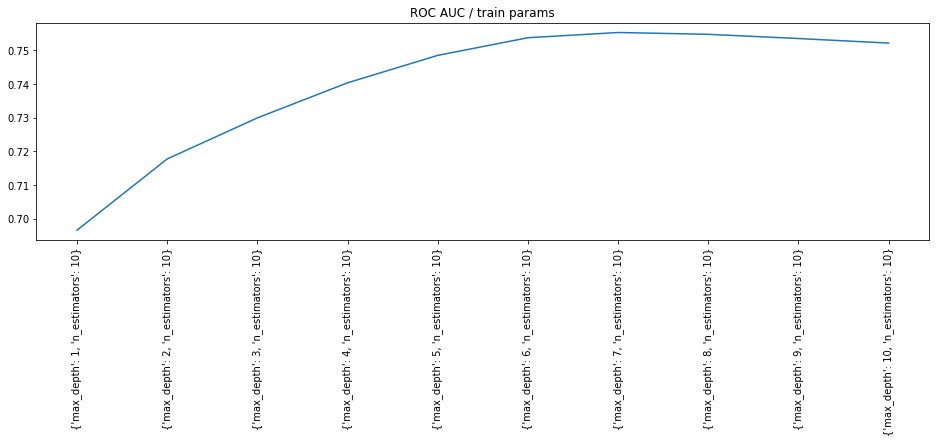

CPU times: user 47.2 s, sys: 20.3 s, total: 1min 7s
Wall time: 1min 7s


In [81]:
%%time
params = {'max_depth': range(1, 11), 'n_estimators': range(10, 11, 10)}
grid = GridSearchCV(XGBRegressor(random_state=17, tree_method='gpu_hist'), params, cv=3, scoring='roc_auc', verbose=True)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(roc_auc_score(y_valid, grid.best_estimator_.predict(X_valid)))
plt.figure(figsize=(16,4))
plt.plot([str(x) for x in grid.cv_results_['params']], grid.cv_results_['mean_test_score'])
plt.xticks(rotation=90)
plt.title('ROC AUC / train params')
plt.show()

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:14:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:15:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:15:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:15:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:15:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:15:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:16:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:16:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:16:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:17:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:17:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:18:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:19:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:19:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:20:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:20:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:21:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:22:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:23:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:24:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:25:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:26:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:27:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:28:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:29:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:30:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:31:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:32:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed: 18.9min finished
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:33:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.7731678507244885
0.7843037427069957


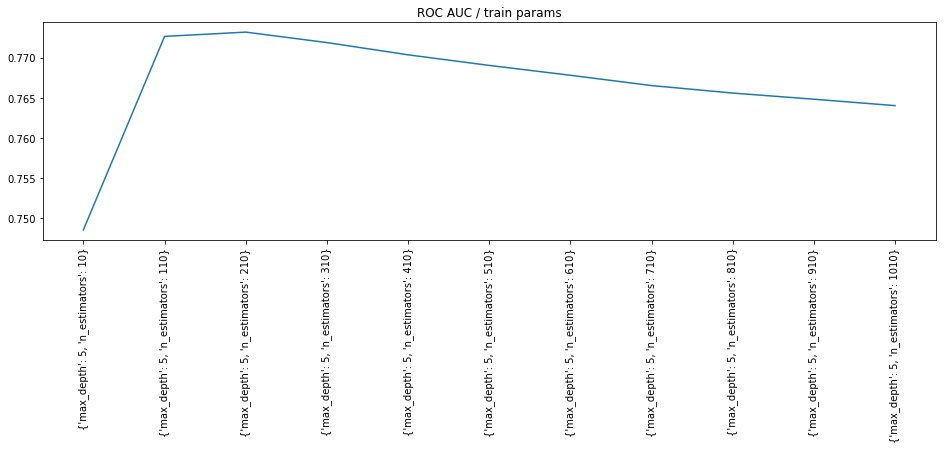

CPU times: user 11min 24s, sys: 7min 47s, total: 19min 12s
Wall time: 19min 13s


In [82]:
%%time
params = {'max_depth': range(5, 6), 'n_estimators': range(10, 1100, 100)}
grid = GridSearchCV(XGBRegressor(random_state=17, tree_method='gpu_hist'), params, cv=3, scoring='roc_auc', verbose=True)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(roc_auc_score(y_valid, grid.best_estimator_.predict(X_valid)))
plt.figure(figsize=(16,4))
plt.plot([str(x) for x in grid.cv_results_['params']], grid.cv_results_['mean_test_score'])
plt.xticks(rotation=90)
plt.title('ROC AUC / train params')
plt.show()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:47:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:47:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:47:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:47:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:47:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:47:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:48:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:48:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:48:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:48:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:48:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:48:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:49:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:49:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:49:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:50:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:50:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:50:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:50:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:51:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:51:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:51:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:51:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:52:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:52:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:52:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:53:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:53:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:53:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  6.9min finished
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:54:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.773369011180841
0.7839278804585729


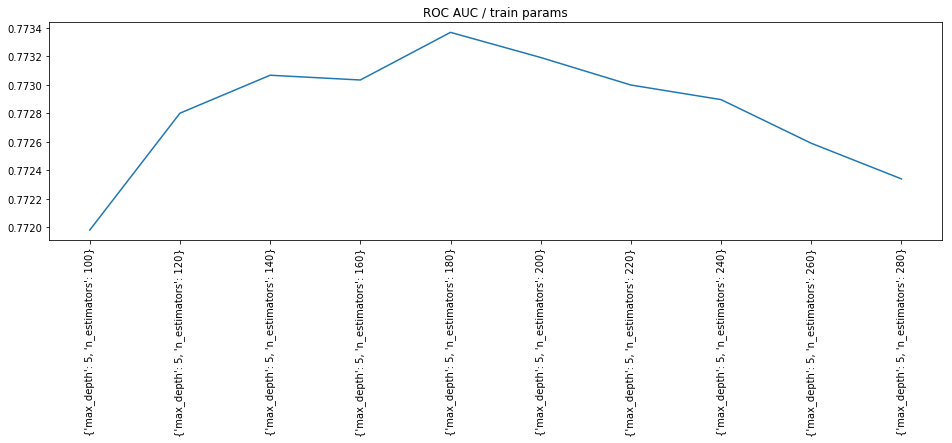

CPU times: user 4min 20s, sys: 2min 49s, total: 7min 10s
Wall time: 7min 10s


In [9]:
%%time
params = {'max_depth': range(5, 6), 'n_estimators': range(100, 300, 20)}
grid = GridSearchCV(XGBRegressor(random_state=17, tree_method='gpu_hist'), params, cv=3, scoring='roc_auc', verbose=True)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(roc_auc_score(y_valid, grid.best_estimator_.predict(X_valid)))
plt.figure(figsize=(16,4))
plt.plot([str(x) for x in grid.cv_results_['params']], grid.cv_results_['mean_test_score'])
plt.xticks(rotation=90)
plt.title('ROC AUC / train params')
plt.show()

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:58:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:58:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:58:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:59:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:59:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:59:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:59:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:59:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:00:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:00:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:00:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:00:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:00:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:01:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:01:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:01:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:01:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:02:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:02:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:02:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:02:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:02:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:03:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:  5.3min finished
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:03:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.7734183760224641
0.7839689430389469


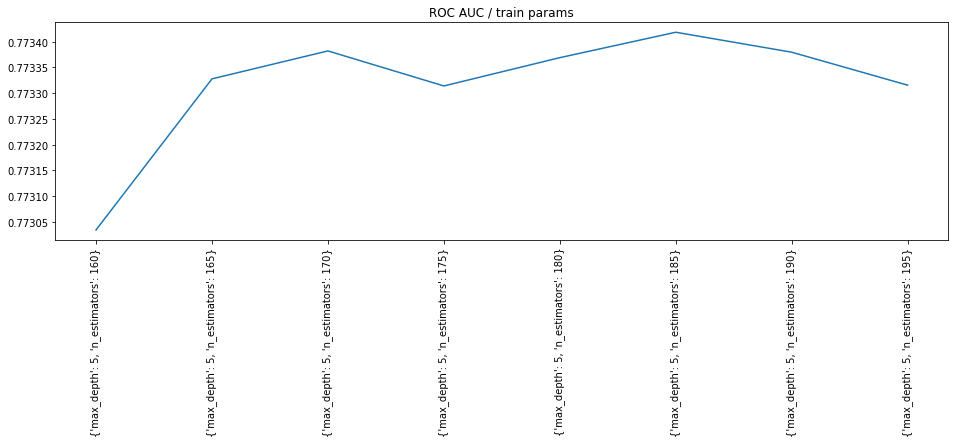

CPU times: user 3min 28s, sys: 2min 9s, total: 5min 37s
Wall time: 5min 37s


In [7]:
%%time
params = {'max_depth': range(5, 6), 'n_estimators': range(160, 200, 5)}
grid = GridSearchCV(XGBRegressor(random_state=17, tree_method='gpu_hist'), params, cv=3, scoring='roc_auc', verbose=True)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(roc_auc_score(y_valid, grid.best_estimator_.predict(X_valid)))
plt.figure(figsize=(16,4))
plt.plot([str(x) for x in grid.cv_results_['params']], grid.cv_results_['mean_test_score'])
plt.xticks(rotation=90)
plt.title('ROC AUC / train params')
plt.show()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[21:12:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   32.2s finished
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[21:13:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.6510872671977525
0.6514490269307177


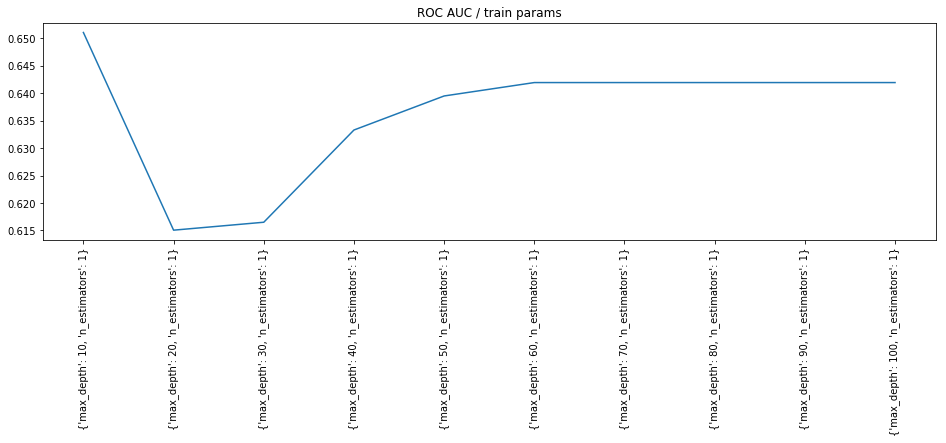

CPU times: user 33.4 s, sys: 446 ms, total: 33.8 s
Wall time: 33.6 s


In [9]:
%%time
params = {'max_depth': range(10, 101, 10), 'n_estimators': range(1, 2)}
grid = GridSearchCV(XGBRegressor(random_state=17), params, cv=3, scoring='roc_auc', verbose=True)
grid.fit(X_train[:10000], y_train[:10000])
print(grid.best_score_)
print(roc_auc_score(y_valid, grid.best_estimator_.predict(X_valid)))
plt.figure(figsize=(16,4))
plt.plot([str(x) for x in grid.cv_results_['params']], grid.cv_results_['mean_test_score'])
plt.xticks(rotation=90)
plt.title('ROC AUC / train params')
plt.show()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:08:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:08:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:08:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:08:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:08:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:08:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:08:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:08:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:08:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:09:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:09:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:09:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:09:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:09:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:09:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:09:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:10:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:10:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:10:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:10:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:10:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:10:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:11:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:11:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:11:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:11:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:11:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:12:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:12:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:12:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  4.5min finished
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:12:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.7579037196389486
0.7634836739324528


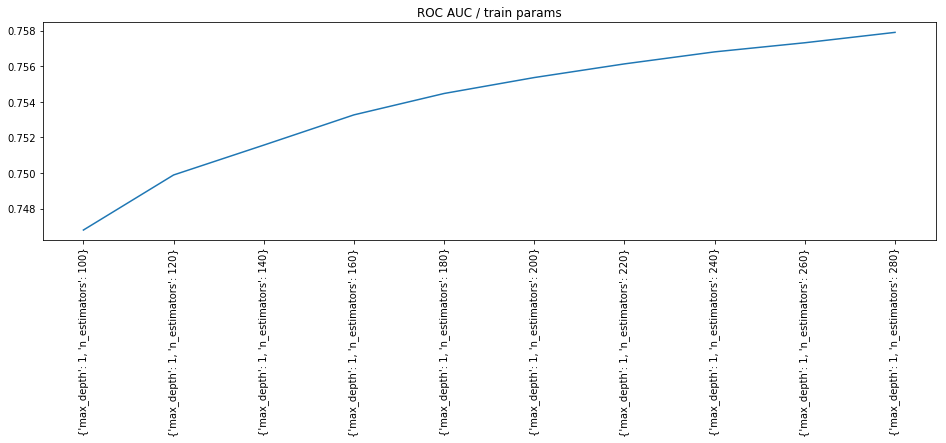

CPU times: user 2min 53s, sys: 1min 53s, total: 4min 47s
Wall time: 4min 47s


In [8]:
%%time
params = {'max_depth': range(1, 2), 'n_estimators': range(100, 300, 20)}
grid = GridSearchCV(XGBRegressor(random_state=17, tree_method='gpu_hist'), params, cv=3, scoring='roc_auc', verbose=True)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(roc_auc_score(y_valid, grid.best_estimator_.predict(X_valid)))
plt.figure(figsize=(16,4))
plt.plot([str(x) for x in grid.cv_results_['params']], grid.cv_results_['mean_test_score'])
plt.xticks(rotation=90)
plt.title('ROC AUC / train params')
plt.show()

In [10]:
%%time
params = {'max_depth': range(1, 100, 20), 'n_estimators': range(1, 1000, 200)}
grid = GridSearchCV(XGBRegressor(random_state=17, tree_method='gpu_hist'), params, cv=3, scoring='roc_auc', verbose=True)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(roc_auc_score(y_valid, grid.best_estimator_.predict(X_valid)))
plt.figure(figsize=(16,4))
plt.plot([str(x) for x in grid.cv_results_['params']], grid.cv_results_['mean_test_score'])
plt.xticks(rotation=90)
plt.title('ROC AUC / train params')
plt.show()

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:15:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:15:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:15:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:15:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:16:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:16:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:16:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:16:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:16:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:17:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:17:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:18:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:18:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:19:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:19:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:20:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:20:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:20:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:20:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: ignored

In [58]:
pickle.dump(grid, open("grid.pkl", "wb"))
FileLink('grid.pkl')

/content/working/grid.pkl

**Validate the model**

In [60]:
grid.best_score_

0.7407665297331806

**Target is 0.756 ROC AUC**

In [61]:
roc_auc_score(y_valid, grid.best_estimator_.predict(X_valid))

0.759178600214076

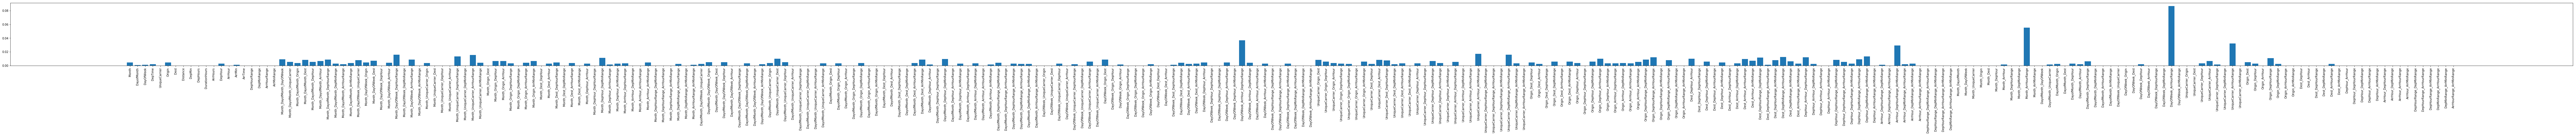

In [62]:
plt.figure(figsize=(120,4))
plt.bar(train_df.columns, grid.best_estimator_.feature_importances_)
plt.xticks(rotation=90)
plt.title('Feature importance')
plt.show()

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:54:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:54:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:54:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:54:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:54:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:54:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:54:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:54:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:54:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:54:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:54:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:54:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:54:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:54:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:55:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:55:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:55:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:55:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:55:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


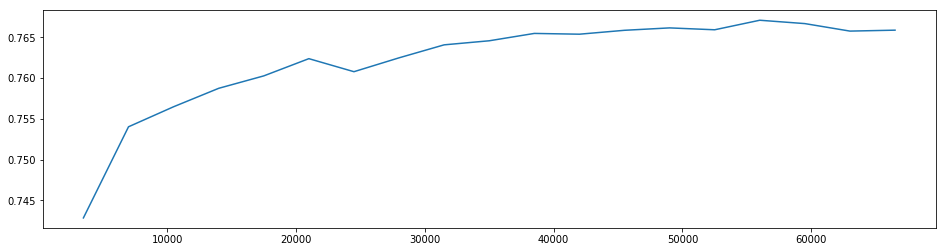

In [66]:
plt.figure(figsize=(16,4))
xx = []
yy = []
cnt = 20
for i in range(1, cnt):
  xx += [len(X_train)//cnt * i]
  yy += [roc_auc_score(y_valid, grid.best_estimator_.fit(X_train[:xx[-1]], y_train[:xx[-1]]).predict(X_valid))]
plt.plot(xx, yy)
plt.title('ROC AUC / train sample size')
plt.show()

**Train on the whole train set, make prediction on the test set.**

In [68]:
%%time
xgb = XGBRegressor(**grid.best_params_, random_state=17, tree_method='gpu_hist')
xgb.fit(train_df, y)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[18:55:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 4.87 s, sys: 2.85 s, total: 7.72 s
Wall time: 7.74 s


In [69]:
pickle.dump(xgb, open("xgb.pkl", "wb"))
FileLink('xgb.pkl')

/content/working/xgb.pkl

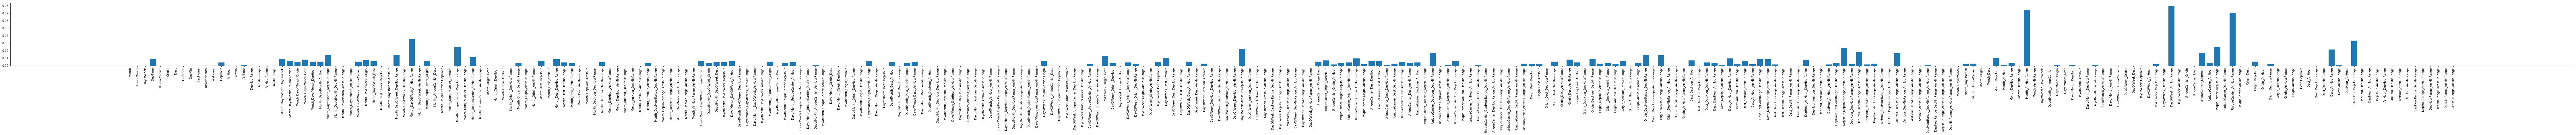

In [71]:
plt.figure(figsize=(120,4))
plt.bar(train_df.columns, xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [74]:
sample_sub = pd.read_csv('../input/flight-delays-fall-2018/sample_submission.csv', index_col='id')
sample_sub['dep_delayed_15min'] = xgb.predict(test_df)
sample_sub.to_csv('submission.csv')
FileLink('submission.csv')

/content/working/submission.csv

In [75]:
!head submission.csv
!ls -l

id,dep_delayed_15min
0,0.030863464
1,0.043341786
2,0.062480003
3,0.19587144
4,0.23617402
5,0.05605504
6,0.110602915
7,0.18582398
8,0.1560184
total 1752
-rw-r--r-- 1 root root   55207 Oct  4 18:47 grid.pkl
-rw-r--r-- 1 root root 1685492 Oct  4 18:59 submission.csv
-rw-r--r-- 1 root root   47528 Oct  4 18:55 xgb.pkl


Now's your turn! Go and improve the model to beat **"A2 baseline (10 credits)"** - **0.75914** LB score. It's crucial to come up with some good features. 

For discussions, stick to the **#a2_kaggle_fall2019** thread in the **mlcourse_ai_news** [ODS Slack](http://opendatascience.slack.com) channel. Serhii Romanenko (@serhii_romanenko) will be there to help. 

Welcome to Kaggle!

![img](https://habrastorage.org/webt/fs/42/ms/fs42ms0r7qsoj-da4x7yfntwrbq.jpeg)
*from the ["Nerd Laughing Loud"](https://www.kaggle.com/general/76963) thread.*

In [21]:
# prepare Kaggle environment
!pwd
!mkdir -pv working
!mkdir -pv input/mlcourse-ai-fall-2019-xgboost
!mkdir -pv input/flight-delays-fall-2018
import os
os.chdir('working')
!pwd
!wget 'https://drive.google.com/uc?export=download&id=1B5u7eMoMoO3DrLPpJVdjauJRcyJQs0lN' -O ../1.zip
!unzip -d ../input/flight-delays-fall-2018/ ../1.zip

!cp -vf /content/gdrive/*/xgboost/*.h5 ../input/mlcourse-ai-fall-2019-xgboost/

!pip uninstall -y tables
!pip install tables
!pip install category_encoders

/content
mkdir: created directory 'working'
mkdir: created directory 'input'
mkdir: created directory 'input/mlcourse-ai-fall-2019-xgboost'
mkdir: created directory 'input/flight-delays-fall-2018'
/content/working
--2019-10-04 18:22:48--  https://drive.google.com/uc?export=download&id=1B5u7eMoMoO3DrLPpJVdjauJRcyJQs0lN
Resolving drive.google.com (drive.google.com)... 74.125.129.113, 74.125.129.139, 74.125.129.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.129.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-c8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/046iflg87cb7pnt2l1n3ivol62fsk1f7/1570212000000/00537968865393874155/*/1B5u7eMoMoO3DrLPpJVdjauJRcyJQs0lN?e=download [following]
--2019-10-04 18:22:50--  https://doc-0o-c8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/046iflg87cb7pnt2l1n3ivol62fsk1f7/1570212000000/00537968865393874155/*/1B5u7eMoMoO3DrLPp

In [1]:
# prepare Kaggle envirnment after restart
!pwd
import os
os.chdir('working')
!pwd

/content
/content/working


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')